In [1]:
#Soup makes it easier to collect certain info from a page
#Tags, properties, text, etc
from bs4 import BeautifulSoup

In [7]:
#You need requests to get the html file of a page (just a txt)

import requests

ex_url = 'https://gate.ahram.org.eg/'

In [14]:
# Just the top (and not very useful)
content = requests.get(ex_url).content
content[0:2000]

b'\n<!DOCTYPE html>\n<html lang="ar">\n<head id="Head1"><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><title>\r\n\t\xd8\xa8\xd9\x88\xd8\xa7\xd8\xa8\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xa3\xd9\x87\xd8\xb1\xd8\xa7\xd9\x85\r\n</title>\n<style>\r\n        .custome41 {\r\n            height: 430px !important;\r\n            max-width: 100% !important;\r\n            width: 100% !important;\r\n        }\r\n\r\n        .custome42 {\r\n            height: 170px !important;\r\n            max-width: 100% !important;\r\n            width: 100% !important;\r\n        }\r\n\r\n        .custome43 {\r\n            height: 210px !important;\r\n            max-width: 100% !important;\r\n            width: 100% !important;\r\n        }\r\n\r\n        .custome44 {\r\n            height: 100px !important;\r\n            max-width: 100% !important;\r\n            width: 100% !important;\r\n        }\r\n\r\n        .custome45 {\r\n            max-h

In [3]:
#This one is optional but it helps in tricking sites from figuring out you are a bot
from random import randint
from time import sleep
from fake_useragent import UserAgent
ua = UserAgent(use_cache_server=False)

In [4]:
#Define a function for getting the html of a site
#Combines fake_useragent, a random wait and requests
def request_url(url):
    sleep_time = randint(1, 5)
    sleep(sleep_time)
    headers = {"User-Agent":ua.random}
    return requests.get(url, verify=False, headers = headers, cookies={'__hs_opt_out': 'no'}).content

In [5]:
def GetSoup(url, cloudflare = True):
    html_doc = 0
    content = request_url(url)
    
    if content is None:
        return -1
    else:
        html_doc = str(content, 'utf-8', 'ignore')
    if html_doc:
        soup = BeautifulSoup(html_doc, 'html.parser')
        return soup
    else:
        return -1

In [16]:
# By passing the url thru beautiful soup we can parse more easily
soup = GetSoup(ex_url)

C:\Users\alcob\anaconda3\envs\map_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gate.ahram.org.eg'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [17]:
#On the page righ-click -> inspect to see the html
#Do it again over whatever element you want to find to see it on the inspect window

# Getting Tabs

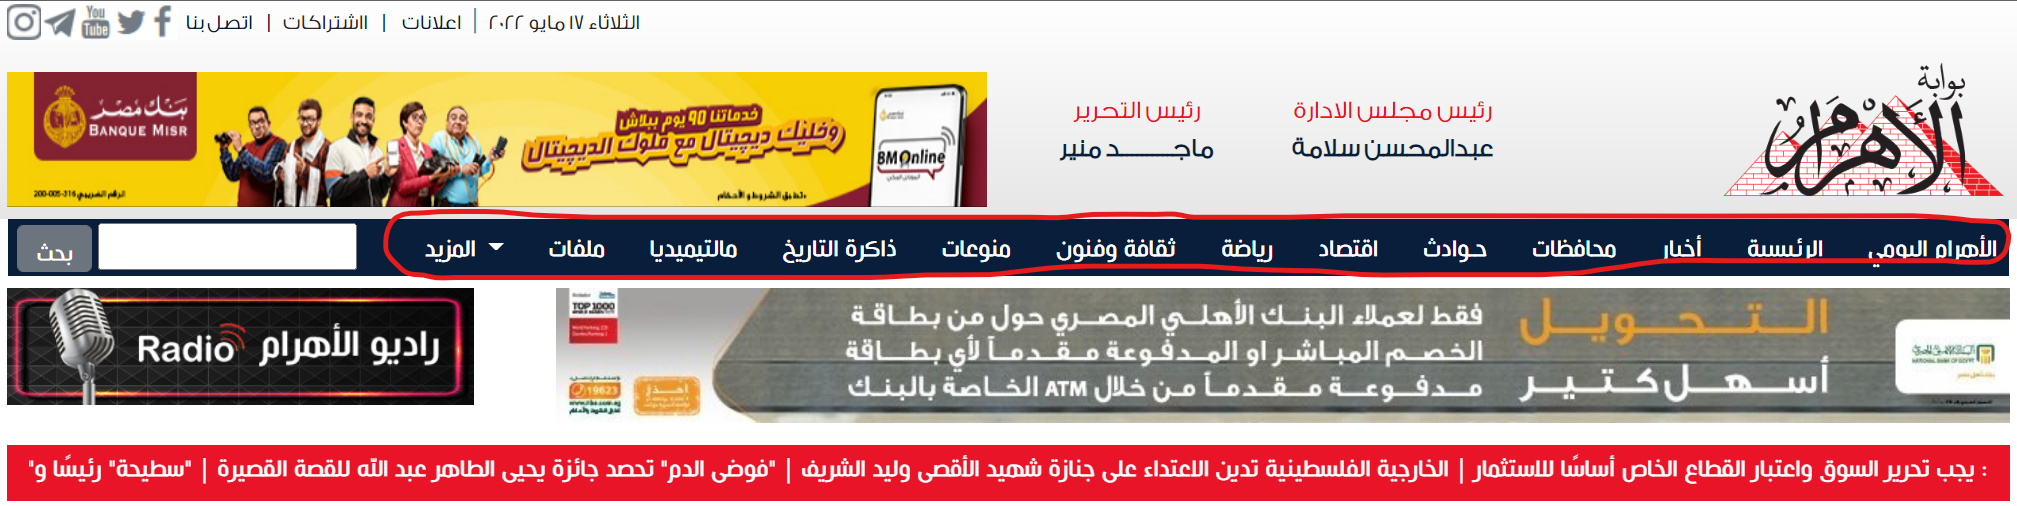

In [18]:
#for example, To get to the tabs of this page we need to find it parent first 
#(or a thing that is easy to find that contains all of them)
# We inspect and get this:

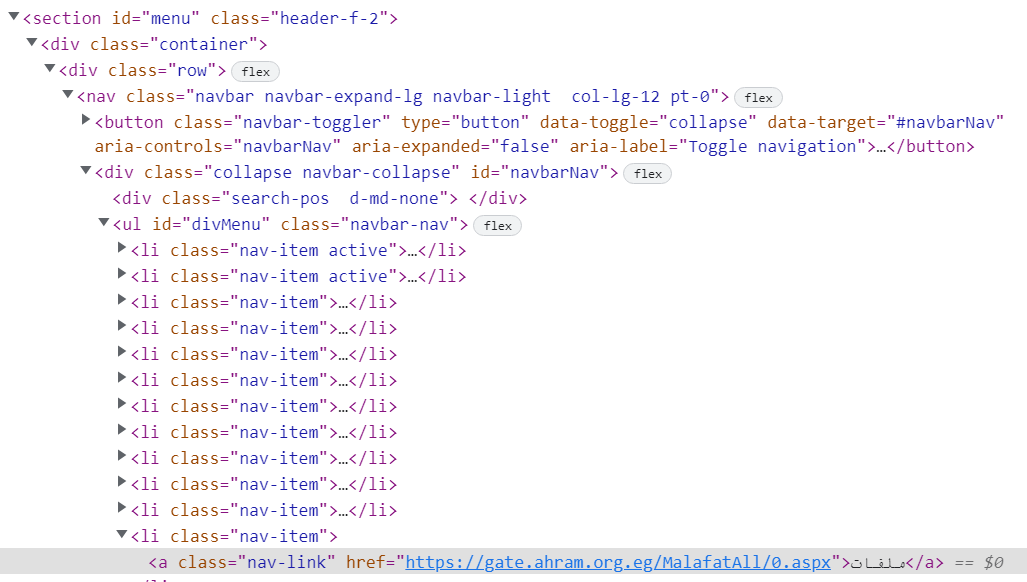

In [19]:
# to find any element using soup we use the find method
# in this case we want to the tag = 'ul' that has the id = 'divMenu' or by the class = 'navbar-nav'

In [20]:
#                .find(tag, <<class_ or id>> = )
tab_parent = soup.find('ul', id = 'divMenu')

In [21]:
tab_parent

<ul class="navbar-nav" id="divMenu"><li class="nav-item active">
<a class="nav-link" href="https://gate.ahram.org.eg/Daily/" target="_blank">الأهرام اليومي </a>
</li><li class="nav-item active"><a class="nav-link" href="/">الرئيسية</a></li><li class="nav-item">
<a class="nav-link" href="https://gate.ahram.org.eg/Portal/13/أخبار.aspx" title="أخبار">أخبار</a>
</li><li class="nav-item">
<a class="nav-link" href="https://gate.ahram.org.eg/Portal/5/محافظات.aspx" title="محافظات">محافظات</a>
</li><li class="nav-item">
<a class="nav-link" href="https://gate.ahram.org.eg/Portal/4/حـوادث.aspx" title="حـوادث">حـوادث</a>
</li><li class="nav-item">
<a class="nav-link" href="https://gate.ahram.org.eg/Portal/14/اقتصاد.aspx" title="اقتصاد">اقتصاد</a>
</li><li class="nav-item">
<a class="nav-link" href="https://gate.ahram.org.eg/Portal/44/رياضة.aspx" title="رياضة">رياضة</a>
</li><li class="nav-item">
<a class="nav-link" href="https://gate.ahram.org.eg/Portal/25/ثقافة-وفنون.aspx" title="ثقافة وفنون">ثقا

In [22]:
# with the parent element, we can now get each the tabs with the method .findAll()
# it works the same way as find, but it gives you a list of all the elements that match
# and not just the first

In [25]:
tab_parent.findAll('a', class_ = 'nav-link')

[<a class="nav-link" href="https://gate.ahram.org.eg/Daily/" target="_blank">الأهرام اليومي </a>,
 <a class="nav-link" href="/">الرئيسية</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/13/أخبار.aspx" title="أخبار">أخبار</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/5/محافظات.aspx" title="محافظات">محافظات</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/4/حـوادث.aspx" title="حـوادث">حـوادث</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/14/اقتصاد.aspx" title="اقتصاد">اقتصاد</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/44/رياضة.aspx" title="رياضة">رياضة</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/25/ثقافة-وفنون.aspx" title="ثقافة وفنون">ثقافة وفنون</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/34/منوعات.aspx" title="منوعات">منوعات</a>,
 <a class="nav-link" href="https://gate.ahram.org.eg/Portal/64/ذاكرة-التاريخ.aspx" title="ذاكرة التاريخ">ذاكرة التاريخ</a>,
 <a

In [27]:
# If we were to want to scrape each of those tabs we'd want just the links (hrefs)
# these are properties of their a tag
# A good way of doing it is with list comprehension

In [30]:
[a['href'] for a in tab_parent.findAll('a', class_ = 'nav-link')]

['https://gate.ahram.org.eg/Daily/',
 '/',
 'https://gate.ahram.org.eg/Portal/13/أخبار.aspx',
 'https://gate.ahram.org.eg/Portal/5/محافظات.aspx',
 'https://gate.ahram.org.eg/Portal/4/حـوادث.aspx',
 'https://gate.ahram.org.eg/Portal/14/اقتصاد.aspx',
 'https://gate.ahram.org.eg/Portal/44/رياضة.aspx',
 'https://gate.ahram.org.eg/Portal/25/ثقافة-وفنون.aspx',
 'https://gate.ahram.org.eg/Portal/34/منوعات.aspx',
 'https://gate.ahram.org.eg/Portal/64/ذاكرة-التاريخ.aspx',
 'https://gate.ahram.org.eg/MultiMediaAll/مالتيميديا.aspx',
 'https://gate.ahram.org.eg/MalafatAll/0.aspx',
 '#']

In [31]:
# We can filter to just get certain links
pages = [a['href'] for a in tab_parent.findAll('a', class_ = 'nav-link') if ('Portal' in a['href'])]
pages

['https://gate.ahram.org.eg/Portal/13/أخبار.aspx',
 'https://gate.ahram.org.eg/Portal/5/محافظات.aspx',
 'https://gate.ahram.org.eg/Portal/4/حـوادث.aspx',
 'https://gate.ahram.org.eg/Portal/14/اقتصاد.aspx',
 'https://gate.ahram.org.eg/Portal/44/رياضة.aspx',
 'https://gate.ahram.org.eg/Portal/25/ثقافة-وفنون.aspx',
 'https://gate.ahram.org.eg/Portal/34/منوعات.aspx',
 'https://gate.ahram.org.eg/Portal/64/ذاكرة-التاريخ.aspx']

In [32]:
# We can iterate thru the list to collect each article in these links

# Iterating thru Pages

In [33]:
url = 'https://www.tsa-algerie.com/ar/?s='

In [34]:
soup = GetSoup(url)

C:\Users\alcob\anaconda3\envs\map_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tsa-algerie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [35]:
# By checking the first few links we see that they are in the format:
# 1) https://www.tsa-algerie.com/ar/?s=
# 2) https://www.tsa-algerie.com/ar/page/2/?s
# 3) https://www.tsa-algerie.com/ar/page/3/?s
# etc

In [36]:
# we can do it in a loop

first_page = 'https://www.tsa-algerie.com/ar/?s='
soup = GetSoup(first_page)
num_pages = 42
current_page = 1
while (current_page <= num_pages):
    
    #
    #Scrape Stuff
    #
    
    current_page += 1
    next_page = f'https://www.tsa-algerie.com/ar/page/{current_page}/?s'
    
    #update soup
    soup = GetSoup(next_page)
    break

C:\Users\alcob\anaconda3\envs\map_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tsa-algerie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alcob\anaconda3\envs\map_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tsa-algerie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
# Getting the number of pages

# Changes on every site, but we want to hunt for this on each page if there are multiple tabs

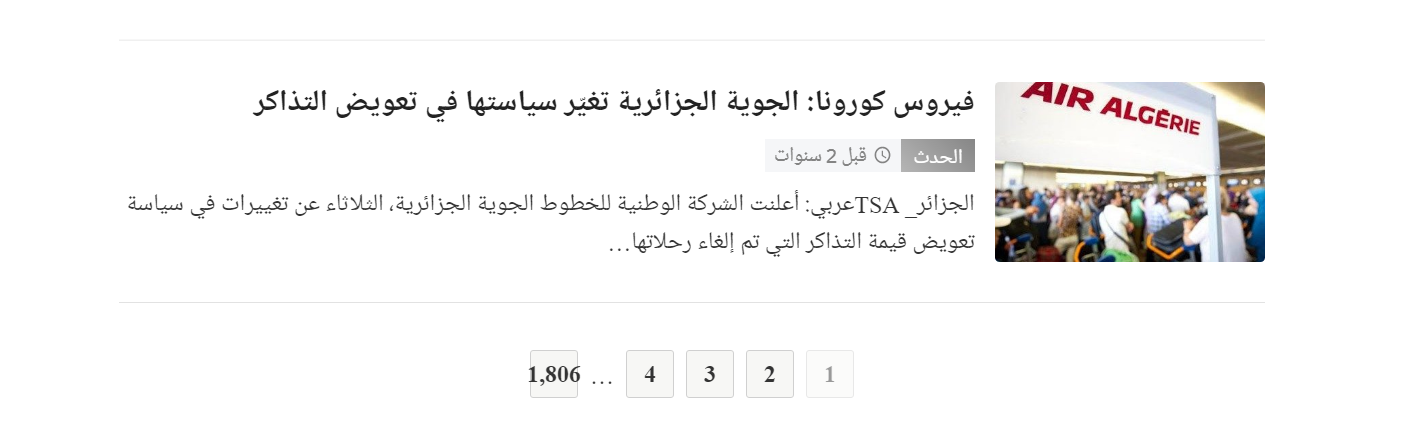

In [38]:
# This page makes it easy, we just need to find the parent > get all the links > get the last one

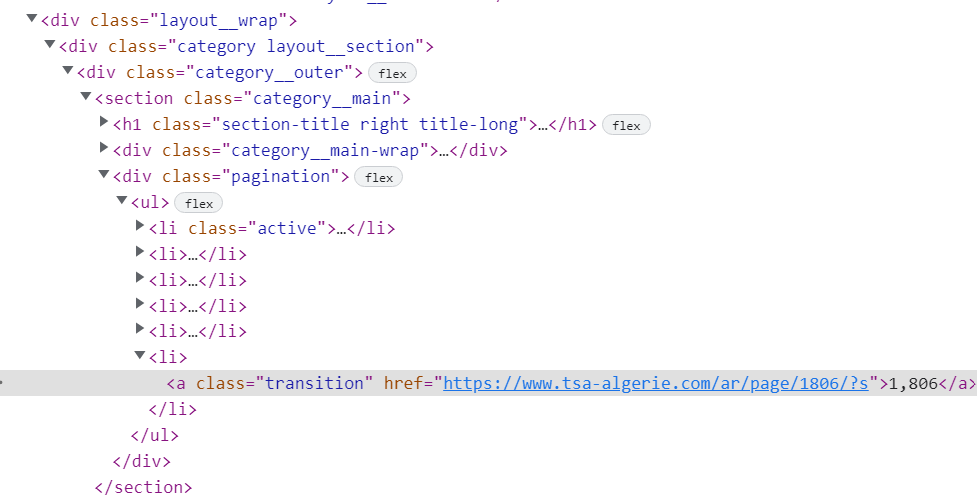

In [39]:
#So from here we can either get the href (where page is 1806) or get the 1,806 (with some cleaning).

In [42]:
                #Parent                                #All links   #Last
num_pages = int(soup.find('div', class_ = 'pagination').findAll('a')[-1]['href'].split('/')[-2])
num_pages

1806

In [48]:
# Or we can get the text

num_pages = int(soup.find('div', class_ = 'pagination').findAll('a')[-1].text.replace(',', ''))
num_pages

# Dont forget to make it an int

1806

In [47]:
# Another place this could be is in some sort of text box in the form of "page 1 of 999"
# if you see it you can find it, get the text, and split(' ') on the empty spaces ad get the last part [-1]

In [ ]:
# we put this in the code

first_page = 'https://www.tsa-algerie.com/ar/?s='
soup = GetSoup(first_page)
num_pages = int(soup.find('div', class_ = 'pagination').findAll('a')[-1]['href'].split('/')[-2])
current_page = 1
while (current_page <= num_pages):
    
    #
    #Scrape Stuff
    #
    
    current_page += 1
    next_page = f'https://www.tsa-algerie.com/ar/page/{current_page}/?s'
    
    #update soup
    soup = GetSoup(next_page)
    break

# Iterating thru Articles

In [50]:
# Here we want to get all the links, we usually want some distict element that is shared between all article tabs
# Common options are the title tags (h1, h2, h3 etc) and with a class like 'article-title' if the page was tagged nicely

In [56]:
articles = soup.findAll('h1', class_ = 'title-middle')
articles[:2]

[<h1 class="article-preview__title title-middle transition">
 <a href="https://www.tsa-algerie.com/ar/%d8%a5%d8%ad%d8%a7%d9%84%d8%a9-%d8%a7%d9%84%d9%82%d8%a7%d8%b6%d9%8a-%d8%b3%d8%b9%d8%af-%d8%a7%d9%84%d8%af%d9%8a%d9%86-%d9%85%d8%b1%d8%b2%d9%88%d9%82-%d9%84%d9%84%d9%85%d8%ad%d8%a7%d9%83%d9%85%d8%a9/">إحالة القاضي سعد الدين مرزوق للمحاكمة ونادي القضاة يندّد بالإجراء ويصفه "بالتعسفي"</a>
 <div><div class="category-inline"><span>الحدث</span></div><div><span class="date-ago">قبل 2 سنوات</span></div></div>
 <div class="mobile"><span class="date-ago">قبل 2 سنوات</span></div>
 </h1>,
 <h1 class="article-preview__title title-middle transition">
 <a href="https://www.tsa-algerie.com/ar/%d9%85%d8%ad%d8%a7%d8%b1%d8%a8%d8%a9-%d9%81%d9%8a%d8%b1%d9%88%d8%b3-%d9%83%d9%88%d8%b1%d9%88%d9%86%d8%a7-%d8%a7%d9%84%d8%ac%d8%b2%d8%a7%d8%a6%d8%b1-%d8%aa%d8%b3%d8%aa%d9%81%d9%8a%d8%af-%d9%85%d9%86/">محاربة فيروس كورونا : الجزائر تستفيد من مساعدة بقيمة 2مليون دولار من الولايات المتحدة الأمريكية</a>
 <div><div cla

In [62]:
# we want to get the the all 'a' and their href so we use the same list comprehension
# and we to avoid any errors (just in case the a tag does not have and a, we filter with an if
urls = [a.find('a')['href'] for a in articles if (a.find('a') != None)]
urls[:3]

# Sometimes check if the page gives you the full url of each article
# They might just give you the location relative to the main page
# like: '/ar/%d8%a5%d8%ad%d8%a7%d9%84%d8%a9-%d8%a7%d9%84%d9%82%d8%a7%d8%b6%d9%8a-%d8%b3%d8%b9%d8%af-%d8%a7%d9%84%d8%af%d9%8a%d9%86-%d9%85%d8%b1%d8%b2%d9%88%d9%82-%d9%84%d9%84%d9%85%d8%ad%d8%a7%d9%83%d9%85%d8%a9/'
# without the 'https://www.tsa-algerie.com'
# When that happens the list comprehension becomes
# urls = ['https://www.tsa-algerie.com/' + a.find('a')['href'] for a in articles if (a.find('a') != None)]

['https://www.tsa-algerie.com/ar/%d9%81%d9%8a%d8%b1%d9%88%d8%b3-%d9%83%d9%88%d8%b1%d9%88%d9%86%d8%a7-%d8%a7%d9%84%d8%ac%d8%b2%d8%a7%d8%a6%d8%b1-%d8%aa%d8%b3%d8%ac%d9%91%d9%849%d9%88%d9%81%d9%8a%d8%a7%d8%aa-%d9%88197%d8%a5%d8%b5/',
 'https://www.tsa-algerie.com/ar/%d9%81%d9%8a%d8%b1%d9%88%d8%b3-%d9%83%d9%88%d8%b1%d9%88%d9%86%d8%a7-%d9%81%d9%8a-%d8%a7%d9%84%d8%ac%d8%b2%d8%a7%d8%a6%d8%b1-%d8%aa%d8%b3%d8%ac%d9%8a%d9%848%d9%88%d9%81%d9%8a%d8%a7%d8%aa-%d9%88-193/',
 'https://www.tsa-algerie.com/ar/%d9%81%d9%8a%d8%b1%d9%88%d8%b3-%d9%83%d9%88%d8%b1%d9%88%d9%86%d8%a7-%d8%a7%d9%84%d8%ac%d8%b2%d8%a7%d8%a6%d8%b1-%d8%aa%d8%b3%d8%ac%d9%91%d9%84-10%d9%88%d9%81%d9%8a%d8%a7%d8%aa-%d9%88-195-%d8%a5%d8%b5/']

In [60]:
# we put this in the code

first_page = 'https://www.tsa-algerie.com/ar/?s='
soup = GetSoup(first_page)
num_pages = int(soup.find('div', class_ = 'pagination').findAll('a')[-1]['href'].split('/')[-2])
current_page = 1
while (current_page <= num_pages):
    
    articles = soup.findAll('h1', class_ = 'title-middle')
    urls = [a.find('a')['href'] for a in articles if (a.find('a') != None)]
    for url in urls:
        #Scrape Url
        pass
    
    current_page += 1
    next_page = f'https://www.tsa-algerie.com/ar/page/{current_page}/?s'
    
    #update soup
    soup = GetSoup(next_page)
    break

C:\Users\alcob\anaconda3\envs\map_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tsa-algerie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alcob\anaconda3\envs\map_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tsa-algerie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


# Saving Data

In [61]:
url

'https://www.tsa-algerie.com/ar/%d9%81%d9%8a%d8%b1%d9%88%d8%b3-%d9%83%d9%88%d8%b1%d9%88%d9%86%d8%a7-%d8%a7%d9%84%d8%ac%d9%88%d9%8a%d8%a9-%d8%a7%d9%84%d8%ac%d8%b2%d8%a7%d8%a6%d8%b1%d9%8a%d8%a9-%d8%aa%d8%ba%d9%8a%d9%91%d8%b1-%d8%b3/'

In [63]:
# Get all the data we want
art_soup = GetSoup(url)
country = 'Algeria'
        
English_name_newspaper = 'TSA'

#(OPTIONAL) Where all the Main Content is
post = art_soup.find('article')

title = post.find('h1').text.strip()

date = post.find('time').text.strip()

# find the where the text is and get all the paragraphs' text and join
text = [a.text for a in post.find('div', class_ = 'article__content').findAll('p')]
    
text =  ' '.join(text).strip()

C:\Users\alcob\anaconda3\envs\map_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tsa-algerie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [65]:
# This is in the json_ext.py file
# put it in the same file location and import like any other package 'import json_ext'
import simplejson as json
import os

# Appends data to end of a json
def OverwriteJson(data, filename='test.json'):
    """ write data to json file """
    with open(filename, mode='w', encoding='utf-8') as f:
        json.dump(data, f)

# Reads the json
def LoadJson(filename='test.json'):
    """ load data from json file """
    with open(filename, mode='r', encoding='utf-8') as f:
        return json.load(f)

# Appends a dictionary to the end of a json file
def SaveEntry(dict_entry, filename='test.json'):
    saved_file = LoadJson(filename)
    saved_file.append(dict_entry)
    OverwriteJson(saved_file, filename = filename)

# For checking if a key-value pair is already in the json
def CheckKeyValue(key, value, filename='test.json'):
    saved_file = LoadJson(filename)
    for item in saved_file:
        if (item[key] == value):
            return True
    return False

#Creates a file if it does not already exists
def MakeFile(filename):
    if (not os.path.isfile(filename)):
        OverwriteJson([],filename)
    else:
        print('File already exists')

In [67]:
file = 'example.json'
MakeFile(file)

File already exists


In [70]:
# from here we can make a dictionary with the data we collected

dict_entry = dict()
dict_entry['url'] = url
dict_entry['English_name_newspaper'] = English_name_newspaper
dict_entry['country'] = country
dict_entry['title'] = title
dict_entry['date'] = date
dict_entry['text'] = text

In [71]:
SaveEntry(dict_entry, file)

# Downloading files

In [ ]:
# We do it with the request package + user agents (for extra protection)

file_url = '' # For an image - search for it in the page, and gets its: src (or data-src) (it is a property so with ['src'])
path = 'folder_name/img.png'
headers = {"User-Agent":ua.random}
img_data = requests.get(file_url, verify=False, headers = headers).content
with open(path, 'wb') as handler:
    handler.write(img_data)

# any other files are saved the same way, just remember to save it with the correct file extension


# This is extra: we might get some garbage 
# this prevents us from downloading any empty images by checking its size before downloading
size = io.BytesIO(img_data)
size.seek(0, 2)
size = size.tell()

if (size > 2500):
    with open(path, 'wb') as handler:
        handler.write(img_data)
    return True
return False